### Image Pipeline

- Take a pic of your face
- Import images into Jupyter Notebook
- Analyze Image (metadata)
- Create Histogram of whole image
- Modify image with brightness and contrast
- Mask out face
- Use mask to create a HSV historgram
- Analyze histogram for skin tone ranges
- Use the HSV ranges to create a mask
- Apply that mask to image and segment out your skin/face

In [106]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [232]:
def draw_rect(img, top_left, bottom_right):
    rect_color = (255,0,0)

    thickness = 2

    # Apply rectangle.
    img_rect = cv2.rectangle(img, top_left, bottom_right, rect_color, thickness)
    # Convert back to RGB
    img_rect = cv2.cvtColor(img_rect, cv2.COLOR_BGR2RGB)

    plt.imshow(img_rect)
    fig = plt.figure(figsize=(10,10))

In [247]:
def draw_mask(img, top_left_x, top_left_y, bottom_right_x, bottom_right_y):
    # Create a black mask
    mask = np.zeros(img.shape[:2], np.uint8)

    # Add the white portion
    mask[top_left_y:bottom_right_y, top_left_x:bottom_right_x] = 255

    plt.imshow(mask, cmap='gray')
    fig = plt.figure(figsize=(10,10))
    return mask

In [271]:
def grab_HSV_values(img, mask):
    # Convert to HSV
    img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    # Plot the hue
    hist = cv2.calcHist([img], [0], mask, [256], [0,255])
    plt.plot(hist, color='red')
    plt.xlim([0,255])

    # Plot the saturation
    hist = cv2.calcHist([img], [1], mask, [256], [0,255])
    plt.plot(hist, color='green')
    plt.xlim([0,255])

    # Plot the value
    hist = cv2.calcHist([img], [2], mask, [256], [0,255])
    plt.plot(hist, color='blue')
    plt.xlim([0,255])
    
    plt.legend(('hue', 'saturation', 'value'), loc ='upper right')
    fig = plt.figure(figsize = (10,10))
    return img

In [272]:
def draw_skin(img, min_hsv, max_hsv):
    # Min and Max HSV values
    min_HSV = np.array(min_hsv, np.uint8)
    max_HSV = np.array(max_hsv, np.uint8)

    skinArea = cv2.inRange(img, min_HSV, max_HSV)

    # Bitwise And mask
    skinHSV = cv2.bitwise_and(img, img, mask=skinArea)

    skinHSV = cv2.cvtColor(skinHSV, cv2.COLOR_HSV2RGB)

    plt.imshow(skinHSV)
    fig = plt.figure(figsize = (10,10))

In [282]:
def skinMap(img_name):
    img = cv2.imread(img_name, 1)
    draw_rect(img, (275, 50), (440, 235))
    mask = draw_mask(img, 275, 50, 440, 235)    
    img = cv2.imread(img_name, 1)
    img = grab_HSV_values(img, mask)
    draw_skin(img, [105,40,10], [180,175,250])
    #draw_skin(img, [0,0,0], [255,255,255])
    

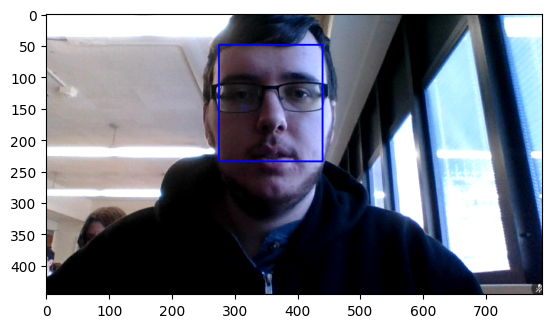

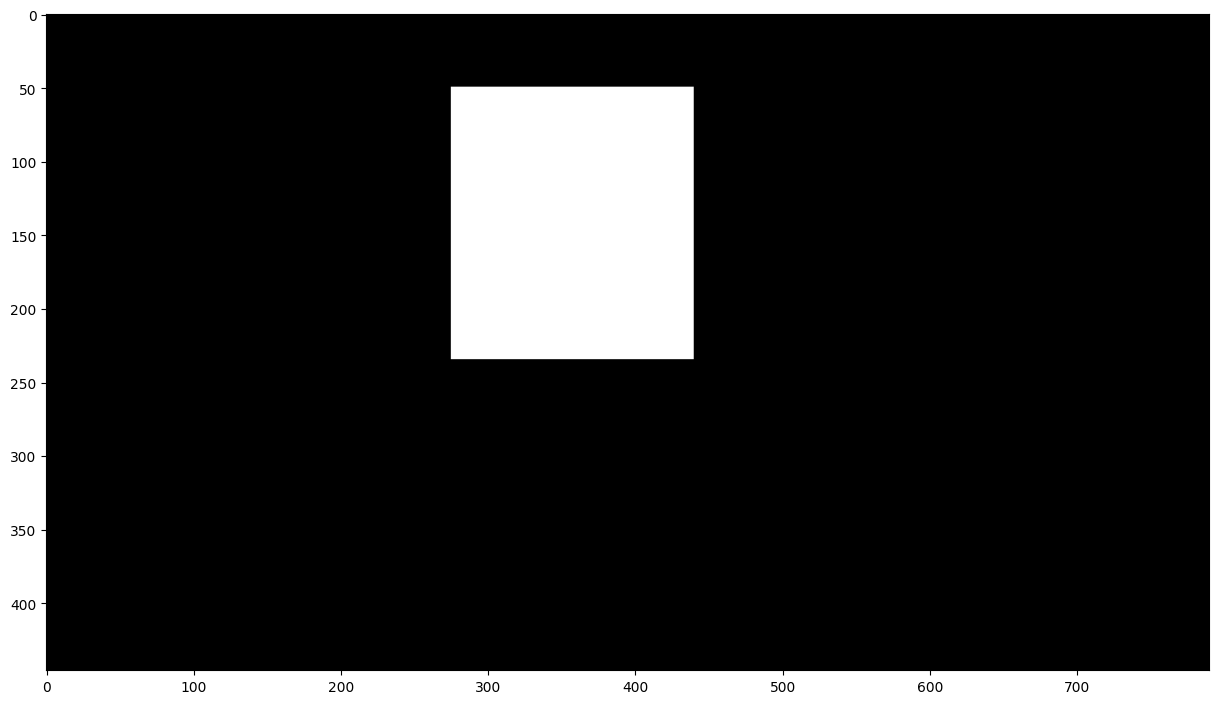

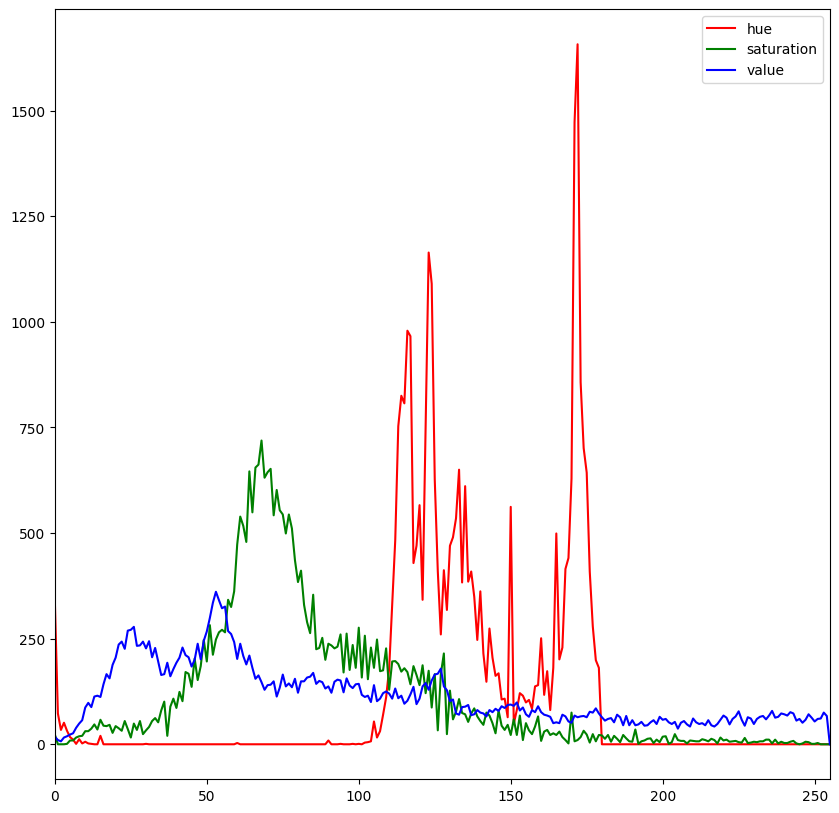

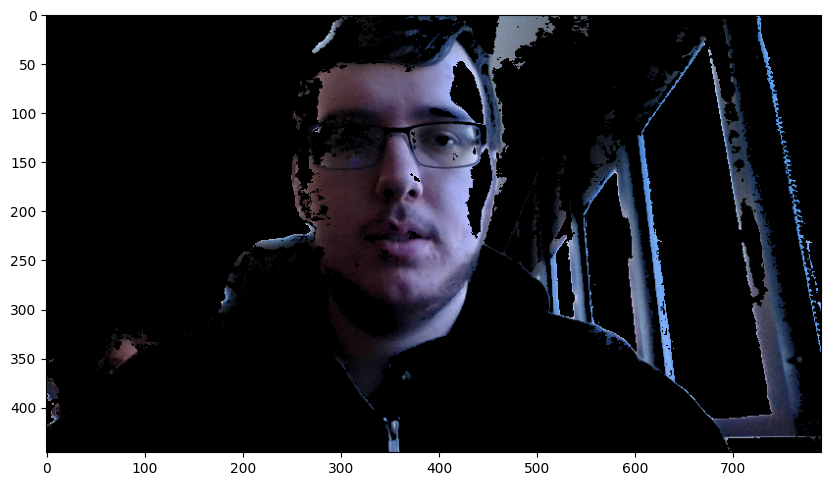

<Figure size 1000x1000 with 0 Axes>

In [283]:
skinMap('image.png')